(lecture06:selecting-rows)=
# Selecting dataframe rows that satisfy a boolean expression

We are now going to put to use what we learned about Python boolean expressions to extract rows from a dataframe that satisfy certain criteria.

## Extract rows that satisfy single boolean expression

Let's do this by example.
Let's load again the `temperature_raw.xlsx` dataset we played with in {ref}`lecture05:models-are-functions`.

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(rc={"figure.dpi":100, 'savefig.dpi':300})
sns.set_context('notebook')
sns.set_style("ticks")
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina', 'svg')
import requests
import os
def download(url, local_filename=None):
    """
    Downloads the file in the ``url`` and saves it in the current working directory.
    """
    data = requests.get(url)
    if local_filename is None:
        local_filename = os.path.basename(url)
    with open(local_filename, 'wb') as fd:
        fd.write(data.content)
   
# The url of the file we want to download
url = 'https://github.com/PurdueMechanicalEngineering/me-297-intro-to-data-science/raw/master/homework/temperature_raw.xlsx'
download(url)
import pandas as pd
df = pd.read_excel('temperature_raw.xlsx')
df = df.dropna(axis=0)
df.date = pd.to_datetime(df['date'], format='%Y-%m-%d')
df.head()

household       date  score     t_out     t_unit        hvac
0        a1 2018-01-07  100.0  4.283373  66.693229  246.473231
1       a10 2018-01-07  100.0  4.283373  66.356134    5.492116
2       a11 2018-01-07   58.0  4.283373  71.549132  402.094327
3       a12 2018-01-07   64.0  4.283373  73.429514  211.692244
4       a13 2018-01-07  100.0  4.283373  63.923937    0.850536

Recall that we made a simple model between the weekly average of the consumed energy in kWh `hvac` and the average weekly external temperature `t_out`.
The model was:

In [2]:
def hvac_model(t_out, a, b, t_out_min=60):
    """
    A naïve model of weekly HVAC energy consumption (kWh) as a function of external temperature t_out.
    The mathematical form of the model is:
    
        hvac = a * (t_out - t_out_min)^2 + b
    
    Arguments:
    t_out      -   The average external temperature in degrees F (average over a week).
    a          -   A parameter to be calibrated using observed data. In units of kWh / (deg F)^2.
    b          -   Another parameter to be calibrated using observed data. This is in units of kWh.
                   It is the energy consumption when the HVAC system is not used.
    t_out_min  -   The external temperature above at which the occupants feel comfortable without using
                   their HVAC system.
    
    Returns: The weekly HVAC energy consumption in kWh.
    """
    return a * (t_out - t_out_min) ** 2 + b

and the predictions looked like this:

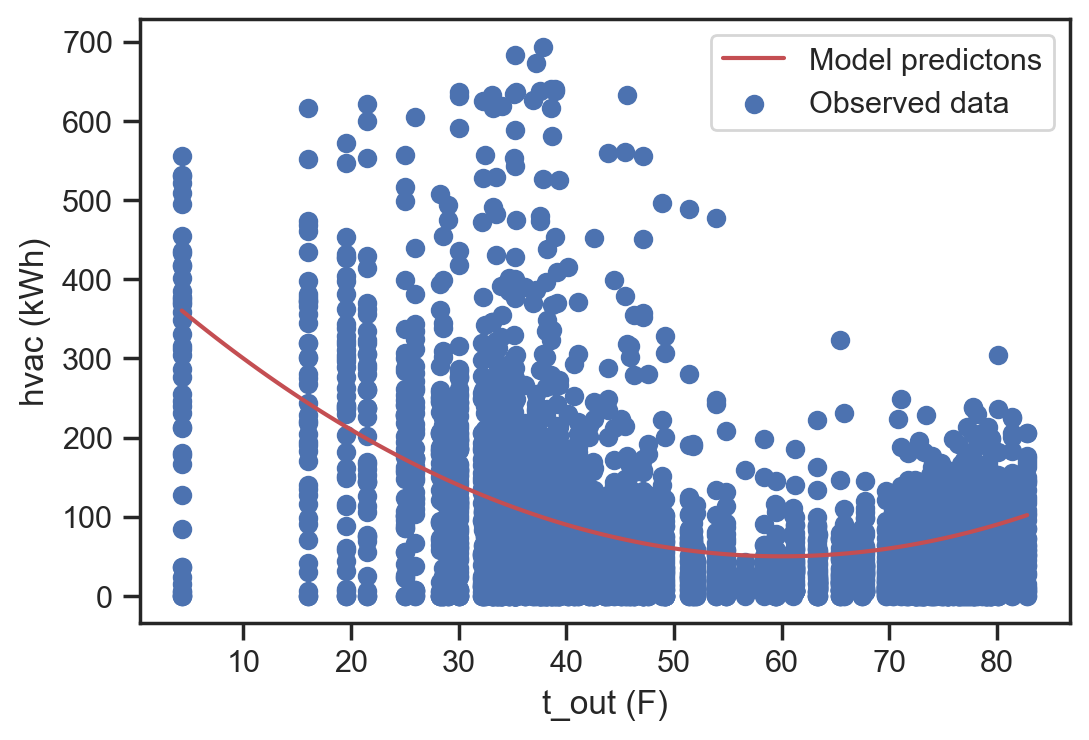

In [3]:
import numpy as np

a = 0.1 # in kWh / F^2
b = 50 # in kWh
fig, ax = plt.subplots()

# First the scatter plot of all the data we have
ax.scatter(df['t_out'], df['hvac'], label='Observed data')
ax.set_xlabel('t_out (F)')
ax.set_ylabel('hvac (kWh)')

# Now pick some temperatures to use our model on:
t_outs = np.linspace(df['t_out'].min(), df['t_out'].max(), 100)
predicted_hvac = hvac_model(t_outs, a, b)
ax.plot(t_outs, predicted_hvac, 'r', label='Model predictons')
plt.legend(loc='best');

Clearly, this model represents some sort of average behavior.
Let's use see how specific households perform.
Here is how many households we have:

In [4]:
df['household'].unique()

array(['a1', 'a10', 'a11', 'a12', 'a13', 'a16', 'a2', 'a3', 'a4', 'a5',
       'a6', 'a7', 'a8', 'a9', 'b17', 'b18', 'b19', 'b20', 'b21', 'b22',
       'b23', 'b24', 'b25', 'b26', 'b28', 'b29', 'b30', 'b31', 'b33',
       'c34', 'c35', 'c36', 'c37', 'c38', 'c39', 'c40', 'c41', 'c42',
       'c43', 'c44', 'c45', 'c46', 'c47', 'c48', 'c49', 'c50', 'a15',
       'a14', 'b32', 'b27'], dtype=object)

How can we extract the data for say household `a1`?
You can do it as follows.
First, notice that you can use a boolean expression directly on the column `household`.
The result is an an array with `True` or `False` indicating the value of the boolean expression on the corresponding rows.
Here it is:

In [5]:
df['household'] == 'a1'

0        True
1       False
2       False
3       False
4       False
        ...  
5643    False
5644    False
5646    False
5647    False
5649    False
Name: household, Length: 4887, dtype: bool

Now, if you feed this array of booleans to the dataframe, it will understand that you only want to keep the rows that are `True`.
Here it is:

In [6]:
df[df['household'] == 'a1']

household       date  score      t_out     t_unit        hvac
0           a1 2018-01-07  100.0   4.283373  66.693229  246.473231
50          a1 2018-01-14   98.0  33.444172  67.812649  116.952821
100         a1 2018-01-21  100.0  19.584102  66.512783  116.128585
150         a1 2018-01-28   96.0  41.076513  69.575546   61.086148
200         a1 2018-02-04   96.0  30.065774  70.085743   61.349374
...        ...        ...    ...        ...        ...         ...
4700        a1 2019-10-27   97.0  54.829439  73.619056    8.560911
4750        a1 2019-11-03   98.0  45.925446  72.456811   14.331006
4800        a1 2019-11-10   97.0  40.175345  72.450988   10.756552
4850        a1 2019-11-17   99.0  32.199504  71.451835   11.828865
4900        a1 2019-11-24   97.0  39.327257  70.896187    8.457236

[82 rows x 6 columns]

So, there are 82 rows corresponding to this household.
If you wanted to find rows of another household, say `b17`, you do this:

In [7]:
df[df['household'] == 'b17']

household       date  score      t_out     t_unit        hvac
16         b17 2018-01-07   73.0   4.283373  74.913484  330.891743
66         b17 2018-01-14   70.0  33.444172  75.113492  163.867247
116        b17 2018-01-21   69.0  19.584102  74.962054  296.645428
166        b17 2018-01-28   70.0  41.076513  74.628770  146.174333
216        b17 2018-02-04   79.0  30.065774  74.340575  244.354832
...        ...        ...    ...        ...        ...         ...
5416       b17 2020-02-02   92.0  33.655308  70.938269  101.666995
5466       b17 2020-02-09   95.0  38.123983  71.553150  109.245547
5516       b17 2020-02-16   92.0  28.548760  71.428274  182.109547
5566       b17 2020-02-23   92.0  33.930233  69.286012  139.912270
5616       b17 2020-02-25   95.0  43.642388  72.251038    8.293659

[113 rows x 6 columns]

So, we have 113 rows for household `b17`.
The difference in the entries is likely due to sensor malfunction.
Now, let's redo our scatter plot but using different colors for `a1` and `b17`.

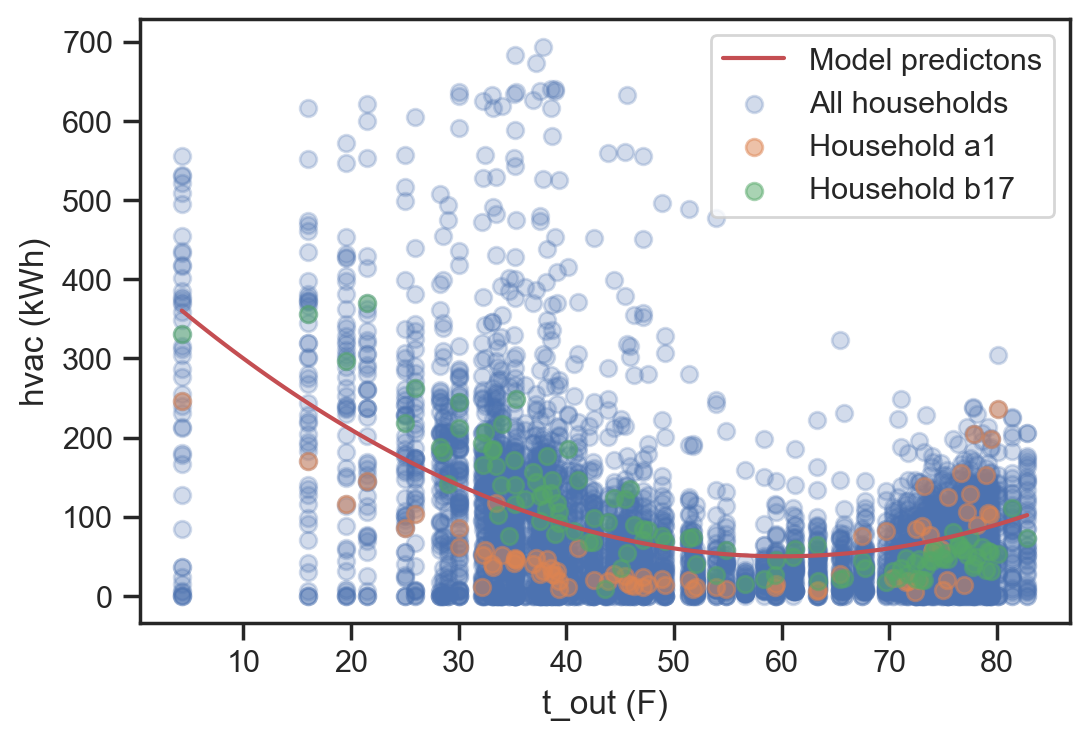

In [8]:
fig, ax = plt.subplots()

# First the scatter plot of all the data we have.
# Notice the keyword argument aplha=0.25. This makes the points transparent.
# alpha=1 means opaque and alpha=0 means invisible. So, something in between
# is transparent.
ax.scatter(df['t_out'], df['hvac'], label='All households', alpha=0.25)

# Do the scatter plot for a1
a1_df = df[df['household'] == 'a1']
ax.scatter(a1_df['t_out'], a1_df['hvac'], label='Household a1', alpha=0.5)
# and the scatter plot for b17
b17_df = df[df['household'] == 'b17']
ax.scatter(b17_df['t_out'], b17_df['hvac'], label='Household b17', alpha=0.5)

# The labels
ax.set_xlabel('t_out (F)')
ax.set_ylabel('hvac (kWh)')

# Plot also our model.
predicted_hvac = hvac_model(t_outs, a, b)
ax.plot(t_outs, predicted_hvac, 'r', label='Model predictons')
plt.legend(loc='best');

### Questions

+ Modify the plot above to add data from household `c36`. 

## Plotting timeseries data

Since we have extracted the data for units `a1` and `b17`, we have a good opportunity to demonstrate another set of useful plots that you can do with dataframes.
We can now plot `t_unit` as a function of the `date` for each one of these units.
Let's do it step by step.
First, see this plot:

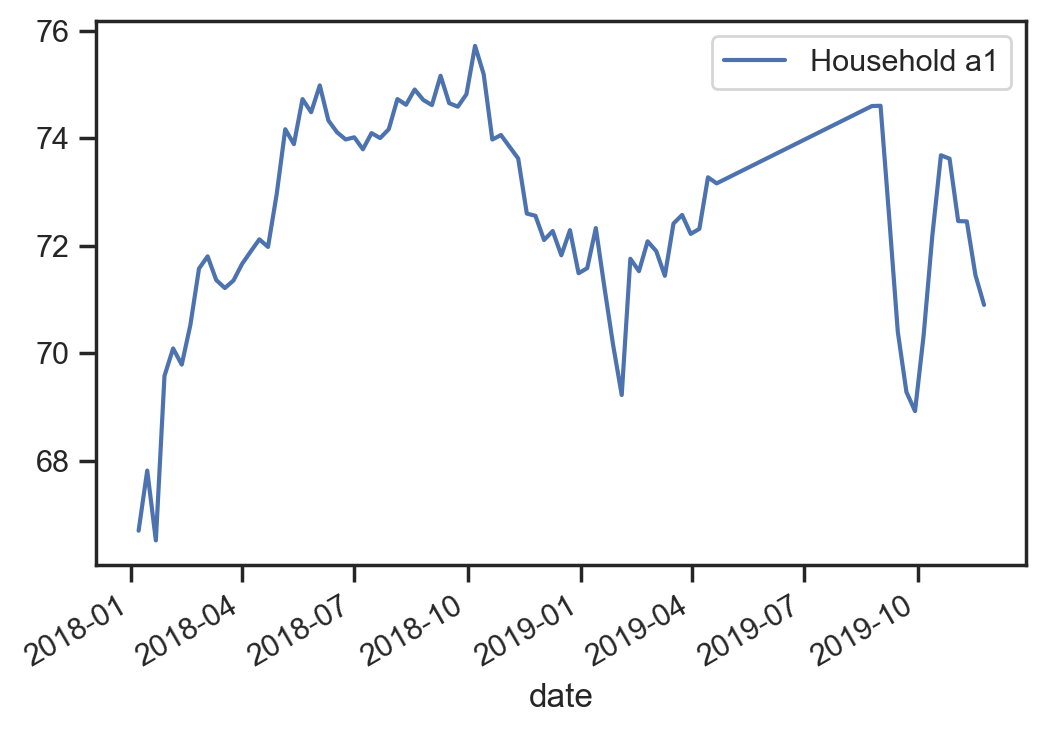

In [22]:
a1_df.plot(x='date', y='t_unit', label='Household a1');

Now, there are some data missing during Spring of 2019 and the dataframe is automatically interpolating.
We could change the style of the plot so that we see the individual data points.

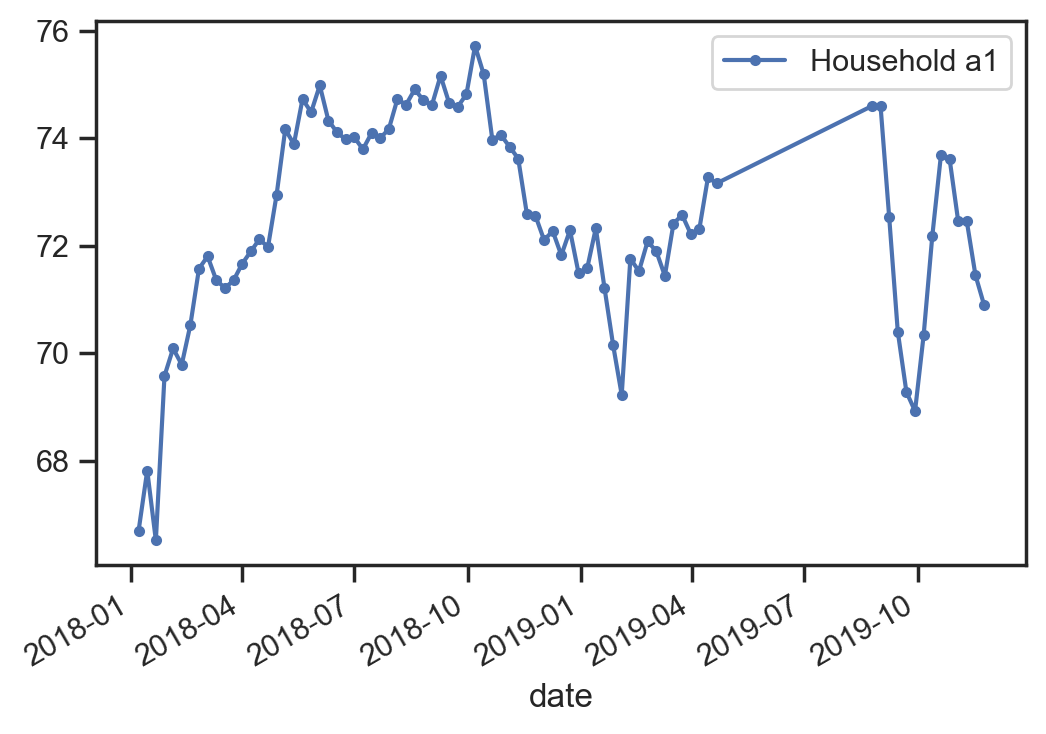

In [23]:
a1_df.plot(x='date', y='t_unit', label='Household a1', style='.-');

Sometimes, you may want to use your own figure object so that you can plot more stuff in it (e.g., titles, labels).
You can do this by passing the `ax` keyword argument:

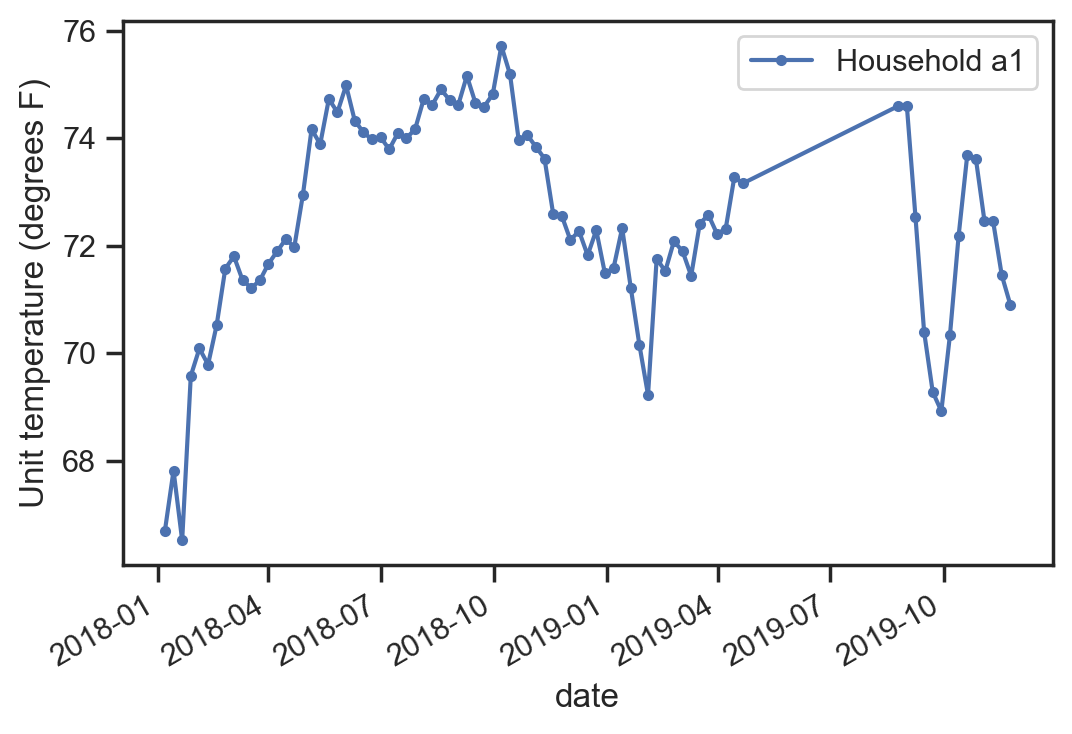

In [24]:
fig, ax = plt.subplots()
a1_df.plot(x='date', y='t_unit', label='Household a1', style='.-', ax=ax)
ax.set_ylabel('Unit temperature (degrees F)');

And here is how you can add the temperature of another unit:

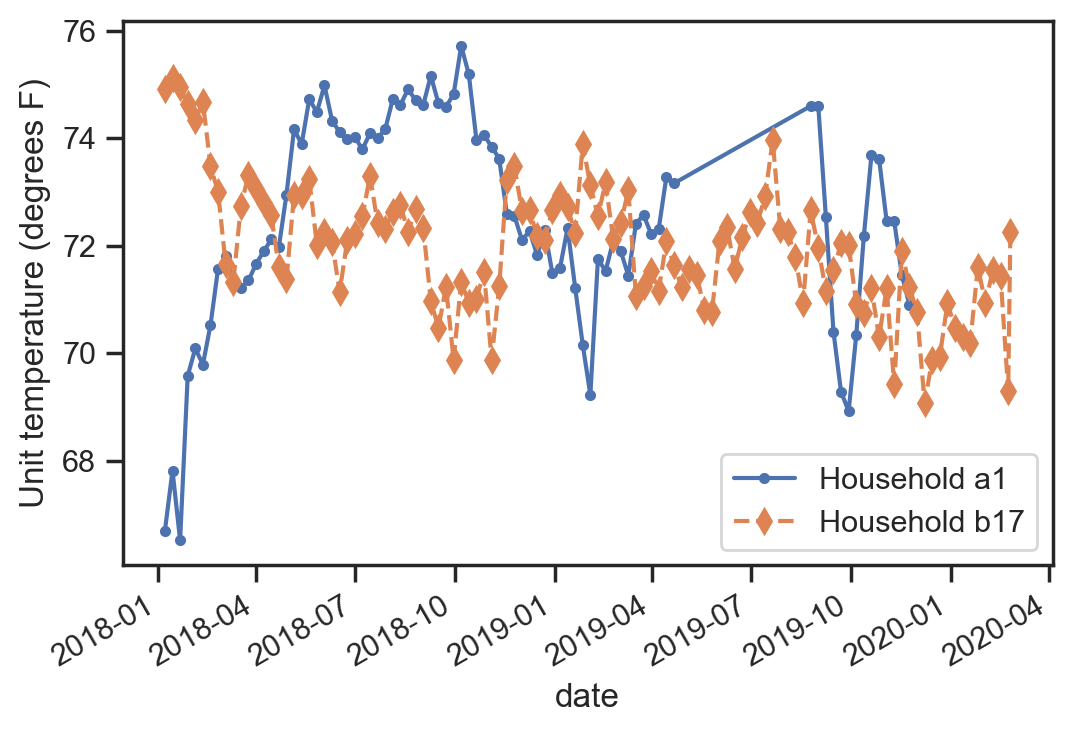

In [25]:
fig, ax = plt.subplots()
a1_df.plot(x='date', y='t_unit', label='Household a1', style='.-', ax=ax)
b17_df.plot(x='date', y='t_unit', label='Household b17', style='d--', ax=ax)
ax.set_ylabel('Unit temperature (degrees F)');

### Questions

+ In the figure of `t_unit` vs `date` above, add data from household `c36`.
+ For households `a1`, `b17` and `c36` plot `hvac` as a function of the `date`. Hint: Change the keyword `y` in `Dataframe.plot()`.

## Avoid writing a lot of code by using loops

So, far we manually extracted the data we need for each unit.
Now, I will show you how you can do it for as many usints as you like using a for loop.
Let's redo our scatter plot for a list of households:

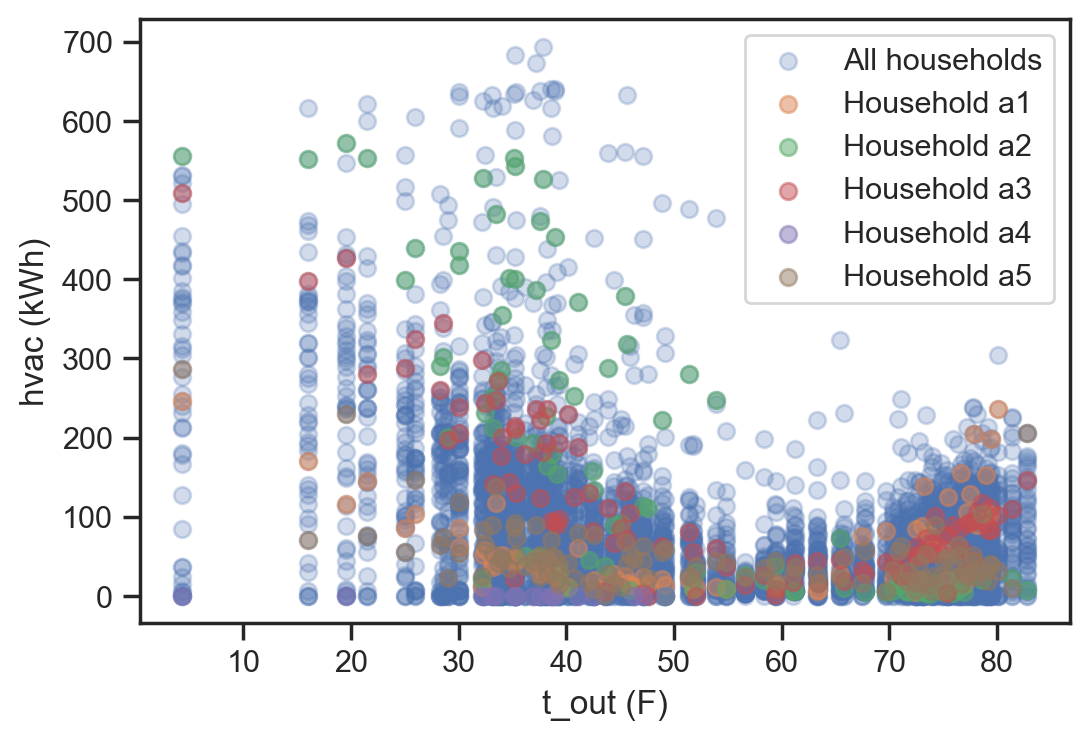

In [35]:
fig, ax = plt.subplots()
ax.scatter(df['t_out'], df['hvac'], label='All households', alpha=0.25)

# Loop over household names
for household_name in ['a1', 'a2', 'a3', 'a4', 'a5']:
    # Extract the relevant data
    df_tmp = df[df['household'] == household_name]
    # Plot the relevant data
    ax.scatter(df_tmp['t_out'], df_tmp['hvac'], label='Household ' + household_name, alpha=0.5)

ax.set_xlabel('t_out (F)')
ax.set_ylabel('hvac (kWh)')
plt.legend(loc='best');

### Questions

+ Modify the code above so that you plot the scatter plot for households `c34` to `c359`.
+ For the same households as above, plot `hvac` as a function of `date`.

## Extract rows that satisfy more complicated boolean expressions

There is really no lilmit to how complicated the boolean expression you use can be.
Let me give you some examples.
Let's say that we want to see how the selection of `t_unit` (temperature setpoint) affects energy consumption during the heating season.
We are on heating season for sure when the external temperature is smaller than 55 degrees F.
Okay, so we need to extract all the rows with `df['t_unit'] < 55`.
Let's do that:

In [26]:
df_heating = df[df['t_out'] < 55]
df_heating

household       date  score      t_out     t_unit        hvac
0           a1 2018-01-07  100.0   4.283373  66.693229  246.473231
1          a10 2018-01-07  100.0   4.283373  66.356134    5.492116
2          a11 2018-01-07   58.0   4.283373  71.549132  402.094327
3          a12 2018-01-07   64.0   4.283373  73.429514  211.692244
4          a13 2018-01-07  100.0   4.283373  63.923937    0.850536
...        ...        ...    ...        ...        ...         ...
5643       c44 2020-02-25   59.0  43.642388  76.494637   19.135139
5644       c45 2020-02-25   87.0  43.642388  71.165052   30.794281
5646       c47 2020-02-25   97.0  43.642388  68.603287    5.339391
5647       c48 2020-02-25   92.0  43.642388  73.429239   18.040078
5649       c50 2020-02-25   59.0  43.642388  77.716955   14.405155

[2741 rows x 6 columns]

Now, we are going to draw the same scatter plot, but we are going to color the points according to the unit temperature `t_unit`.
Let's have pick the rows with `t_unit` between 70 and 72 degrees F.

In [27]:
df_heating_70to72 = df_heating[df_heating['t_unit'] >= 70 and
                               df_heating['t_unit'] < 72]
df_heating_70to72.head()

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

The problem here is that the on the left and on the right of the logical `and` operator you have arrays of booleans not just booleans.
So, Python does not know what to do with them.
The correct operator to use to represent logical `AND` in this situation is `&` (which you can also read as `AND`).
Let's try again.
This time we are going to get a really big error message.
I'm going to hide it.

In [28]:
df_heating_70to72 = df_heating[df_heating['t_unit'] >= 70 &
                               df_heating['t_unit'] < 72]
df_heating_70to72.head()

TypeError: Cannot perform 'rand_' with a dtyped [float64] array and scalar of type [bool]

The problem here is that Python is the order in which the expression is evaluated. 
The operator `&` has a special meaning in Python (we are not going to get into it) and it has high priority.
So, python tries to evaluate first `68 & df_heating['t_unit']` which is meanigless.
What needs to happen here is that is should first evaluate `df_heating['t_unit'] >= 68` to get an array of booleans, then evaluate `df_heating['t_unit'] < 70` to get another array of booleans, and the use `&` to logically compare the arrays pointwise.
We can enforce this order using parentheses.
Whatever Python expression is enclosed in parentheses will be evaluated first.
So, here is the correct way to do it:

In [29]:
df_heating_70to72 = df_heating[(df_heating['t_unit'] >= 70) &
                               (df_heating['t_unit'] < 72)]
df_heating_70to72.head()

household       date  score     t_out     t_unit        hvac
2        a11 2018-01-07   58.0  4.283373  71.549132  402.094327
17       b18 2018-01-07   87.0  4.283373  70.608333  368.153883
25       b26 2018-01-07   97.0  4.283373  70.014178   36.645884
29       b30 2018-01-07   99.0  4.283373  71.423206   23.679263
34       c35 2018-01-07   96.0  4.283373  70.558912  349.025111

And let's plot the scatter plot highlighting the different unit temeprature ranges with different colors:

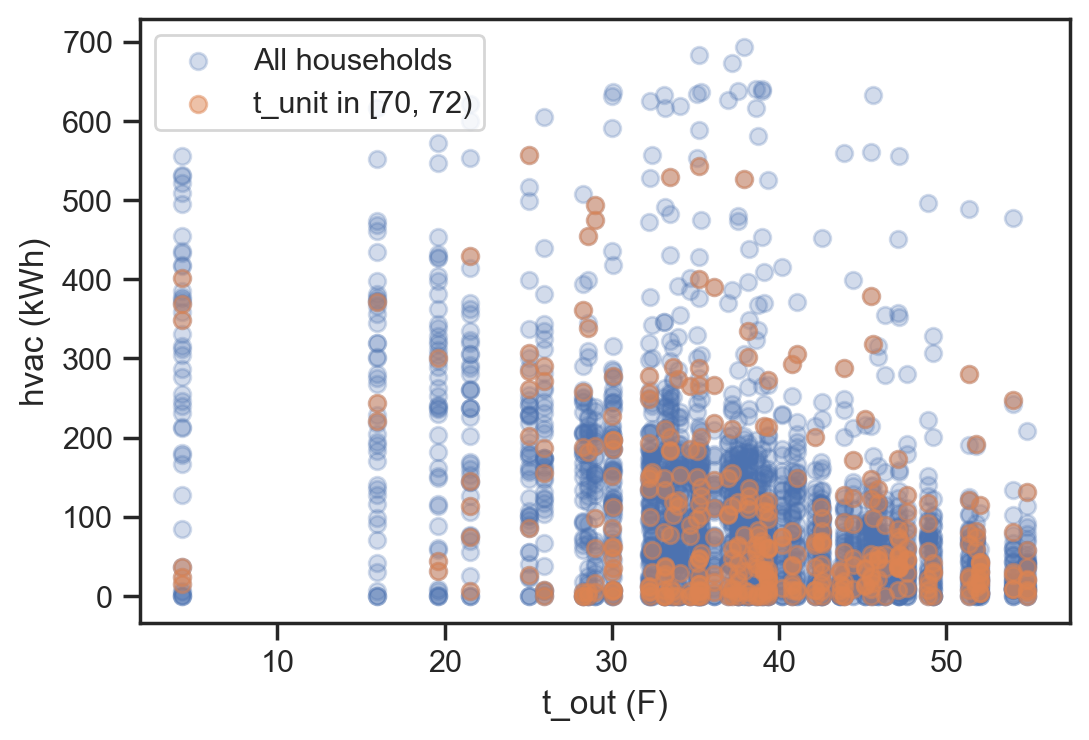

In [30]:
fig, ax = plt.subplots()

ax.scatter(df_heating['t_out'], df_heating['hvac'], label='All households', alpha=0.25)
ax.scatter(df_heating_70to72['t_out'], df_heating_70to72['hvac'], 
           label='t_unit in [70, 72)', alpha=0.5)
ax.set_xlabel('t_out (F)')
ax.set_ylabel('hvac (kWh)')
plt.legend(loc='best');

Let's finish this section by demonstrating logical `OR` for selecting rows.
As you may have guessed `or` does not work.
We need to use the operator `|`.
And yes, we need to enclose everything in parentheses.
Let's select the entries that exhibit bad energy consuming behavior.
That would be units that have a very high `t_unit` (say above 78) during heating or a very low `t_unit` during cooling (say below 70).
Let's see how much energy they consume.

In [31]:
df_bad_behavior = df[((df['t_out'] < 55) & (df['t_unit'] > 78)) |
                     ((df['t_out'] >= 55) & (df['t_unit'] < 70))]
df_bad_behavior.head()

household       date  score      t_out     t_unit        hvac
15         a9 2018-01-07   39.0   4.283373  78.709433  495.227311
22        b23 2018-01-07   44.0   4.283373  78.618808  359.167522
65         a9 2018-01-14   41.0  33.444172  78.557192  321.834468
72        b23 2018-01-14   43.0  33.444172  78.684325  197.924672
115        a9 2018-01-21   41.0  19.584102  78.572321  431.236407

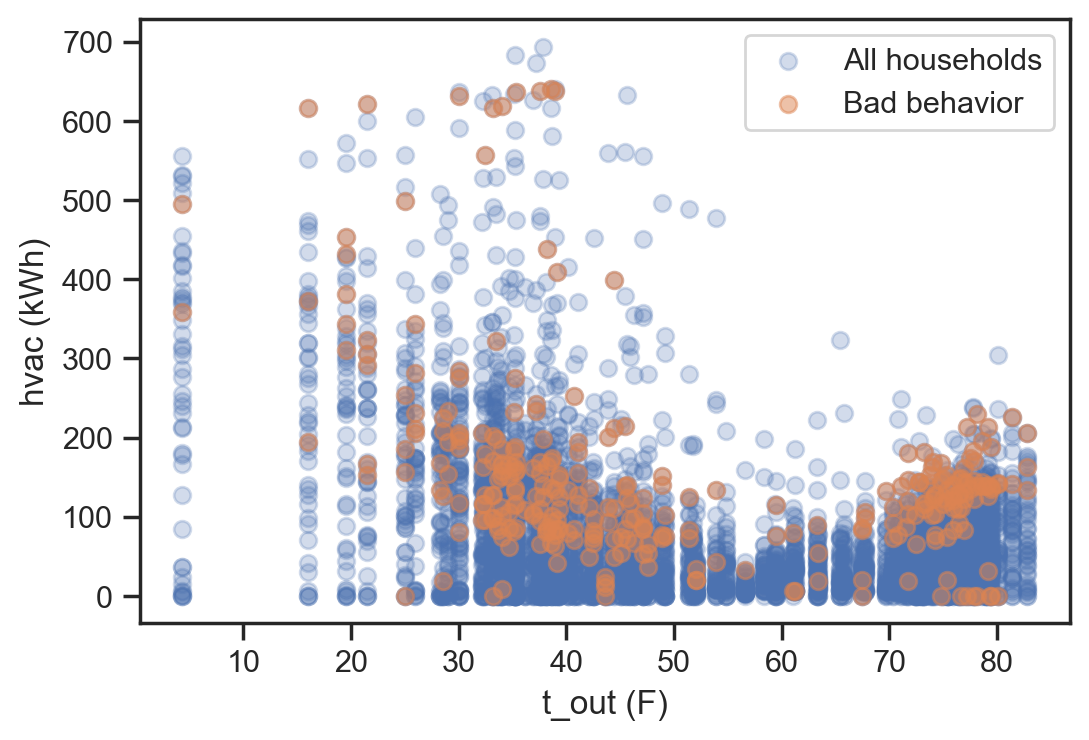

In [32]:
fig, ax = plt.subplots()

ax.scatter(df['t_out'], df['hvac'], label='All households', alpha=0.25)
ax.scatter(df_bad_behavior['t_out'], df_bad_behavior['hvac'], 
           label='Bad behavior', alpha=0.5)

ax.set_xlabel('t_out (F)')
ax.set_ylabel('hvac (kWh)')
plt.legend(loc='best');

Notice that they are some entries that exhibit bad behavior without being penalized by excessive energy consumption.
This is because of a third variable that affects energy consumption, i.e., the location of the unit in the building.
Here is what is happening:
+ Units that are at the corners of the building expose at least two sides to the external environment.
+ Units that are on the top floor expose at least two sides to the external environment.
+ Units that are at a corner and on the top floor expose three sides to the external environment.
+ The rest of the units expose a single side to the external environment.
The first three groups (and especially the third group) are loosing a lot of energy to the environment and their energy consumption will in general be higher.
The final group is basically insulated from the environment and on top of that they may be getting heat energy from their neighbors.
Behaving badly in a top floor, corner unit will be reflected on your energy bill.
Behaving badly in an insulated unit may have no effect on your energy bill.

Let's end with logical `NOT`.
Say we wanted to negate the previous selection so that we highlight all those who behaved well.
For this, you use the `~` operator in front of the logical expression you want to negate.
Like this:

In [33]:
df_good_behavior = df[~(((df['t_out'] < 55) & (df['t_unit'] > 78)) |
                        ((df['t_out'] >= 55) & (df['t_unit'] < 70)))]
df_bad_behavior.head()

household       date  score      t_out     t_unit        hvac
15         a9 2018-01-07   39.0   4.283373  78.709433  495.227311
22        b23 2018-01-07   44.0   4.283373  78.618808  359.167522
65         a9 2018-01-14   41.0  33.444172  78.557192  321.834468
72        b23 2018-01-14   43.0  33.444172  78.684325  197.924672
115        a9 2018-01-21   41.0  19.584102  78.572321  431.236407

Again, pay attention to the parentheses because they are critical for the correct evaluation of the expression.

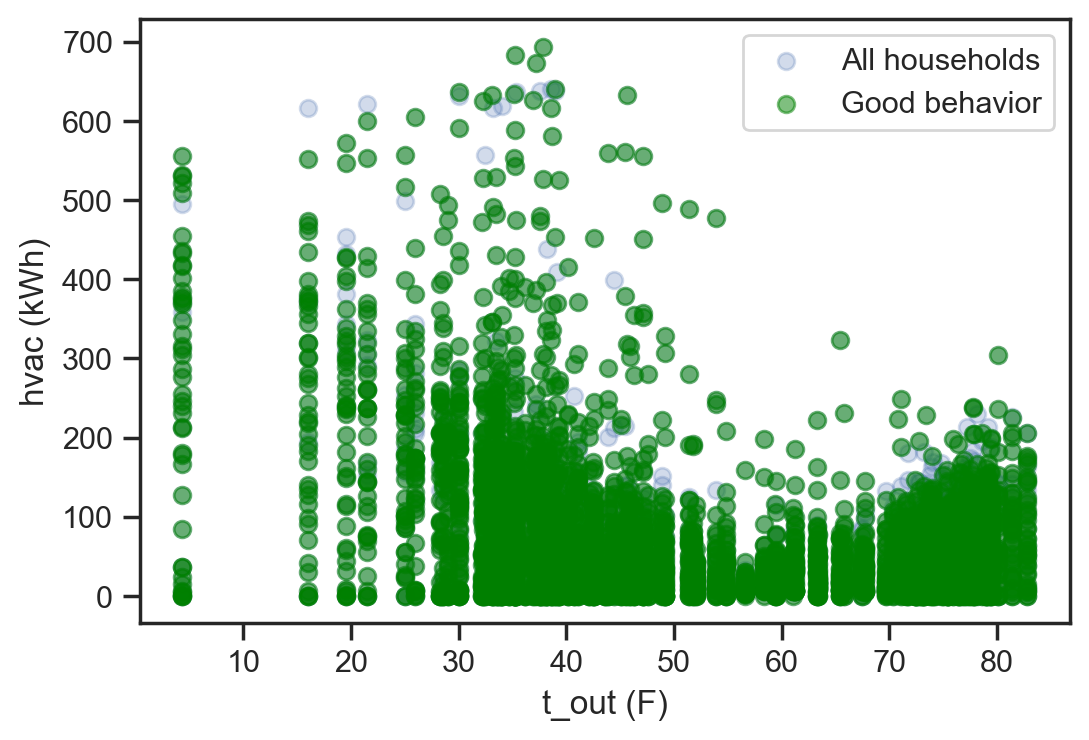

In [34]:
fig, ax = plt.subplots()

ax.scatter(df['t_out'], df['hvac'], label='All households', alpha=0.25)
ax.scatter(df_good_behavior['t_out'], df_good_behavior['hvac'], 
           label='Good behavior', color='green', alpha=0.5)

ax.set_xlabel('t_out (F)')
ax.set_ylabel('hvac (kWh)')
plt.legend(loc='best');

### Questions 

+ The final histogram highlighting units with good behavior is not very useful because the range of `t_unit` temperatures we considered as good is too wide. Rerun the code block above using a narrower range of temperatures. Say a bad choice for heating is `t_unit` > 72 and a bad for cooling is `t_unit` < 75. Then, redo the scatter plot.